## Pre-amble

In [78]:
import networkx as nt
import urllib.request as url
from matplotlib.pyplot import *

In [81]:
import numpy as np
import pandas as pd

In [14]:
fil1 = url.urlretrieve('https://www.stats.ox.ac.uk/~reinert/dtc/YeastL.net')

## Run custom code

In [39]:
import os
import sys
pyfile = url.urlretrieve('https://www.stats.ox.ac.uk/~reinert/dtc/extraNetwork.py','extraNetwork.py')
#sys.path.append(pyfile[0])
import extraNetwork

Make graph

In [43]:
extraNetwork.fixNamingProblem(fil1[0])

In [44]:
yeast = nt.Graph(nt.read_pajek(fil1[0]))

In [45]:
yeast.remove_edges_from(yeast.selfloop_edges())

In [48]:
nt.density(yeast)

0.0023855160482128372

In [49]:
nt.transitivity(yeast)

0.10231488638120266

In [50]:
graph1 = max(nt.connected_component_subgraphs(yeast), key = len)

In [51]:
nt.average_shortest_path_length(graph1)

4.37626538445357

In [53]:
bet = nt.betweenness_centrality(graph1)

Text(0.5,1,'Betweenness Histogram')

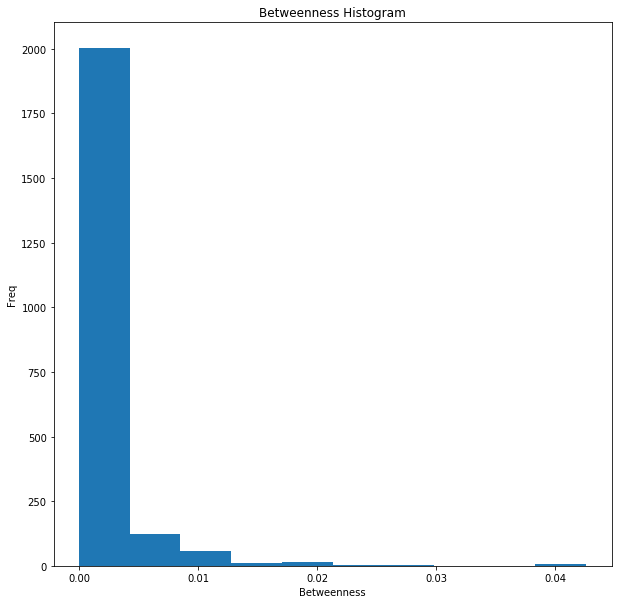

In [68]:
fig = plt.figure(figsize=[10,10])
plt.hist(bet.values())
plt.xlabel('Betweenness')
plt.ylabel('Freq')
plt.title('Betweenness Histogram')

/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


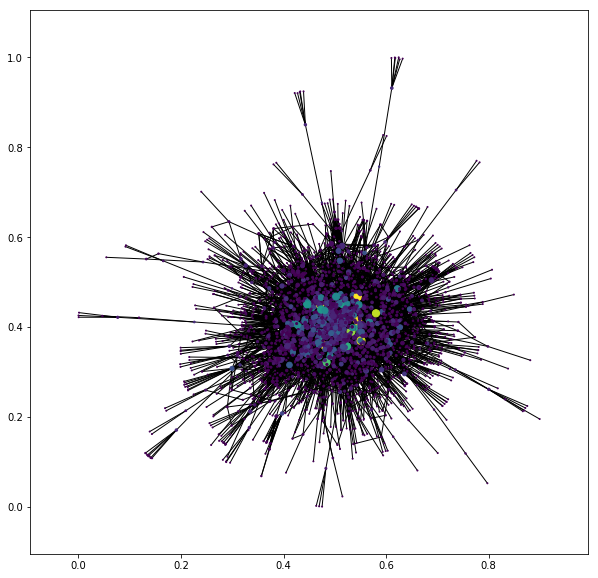

In [75]:
plt.figure(figsize = [10,10])
nodes=graph1.nodes()
nt.draw_networkx(
    graph1,nodelist=nodes,
    node_color=[bet[x] for x in nodes],
    node_size=[len(yeast[x]) for x in nodes],
    with_labels=0)

# Random Graphs

In [76]:
er1 = networkx.fast_gnp_random_graph(10000, 1.0/1000.0)
er2= networkx.fast_gnp_random_graph(10000, 2.0/1000.0)

In [77]:
networkx.transitivity(er1)
networkx.transitivity(er2)

0.0019980534865858203

Text(0.5,1,'Second graph')

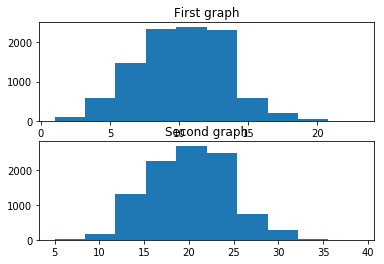

In [79]:
figure()
f1=subplot(2,1,1)
hist(er1.degree().values())
f1.set_title('First graph')
f2=subplot(2,1,2)
hist(er2.degree().values())
f2.set_title('Second graph')

In [87]:
np.mean(list(er1.degree().values()))
np.mean(list(er2.degree().values()))

20.0136

Watts-Strogatz small worlds

In [88]:
ws1 = networkx.random_graphs.watts_strogatz_graph(100, 5, 0.5)

Barabasi-Albert networks

In [89]:
bar1 = networkx.random_graphs.barabasi_albert_graph(10000,1)
bar2=extraNetwork.barabasi_albert_graph_modified(10000, 1,2)

# Monte Carlo Test

In [94]:
n=yeast.number_of_nodes()
p = 2*yeast.number_of_edges()/float(n*(n-1))
w=[]
for run in range(49):
    G = networkx.fast_gnp_random_graph(n,p)
    w.append(networkx.transitivity(G))

yeast_trans=networkx.transitivity(yeast)
w.append(yeast_trans)
print(sorted(w).index(yeast_trans))

49


In [97]:
w=[networkx.transitivity(networkx.fast_gnp_random_graph(n,p)) 
   for run in range(49)]

# Ego-networks

In [100]:
url.urlretrieve("http://www.stats.ox.ac.uk/~reinert/dtc/communityDetection.py",'communityDetection.py')

('communityDetection.py', <http.client.HTTPMessage at 0x7f410c2fe518>)

In [101]:
import communityDetection

In [102]:
sortedNodes=sorted(yeast.nodes(),key=lambda x:int(x.split(' ')[0]))
node=sortedNodes[0]
sub=extraNetwork.snowballSample(yeast,[node],1)

/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


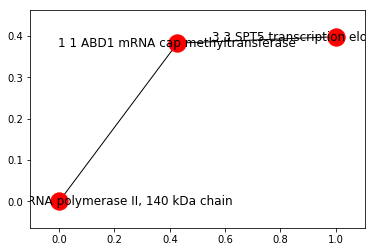

In [103]:
figure()
networkx.draw_networkx(sub)

In [105]:
n1=sortedNodes[1982]
n2=sortedNodes[1553]
print(len(yeast[n1]))
len(yeast[n2])

28


28

In [106]:
Sub_n1=extraNetwork.snowballSample(yeast,[n1],1)
Sub_n2=extraNetwork.snowballSample(yeast,[n2],1)

/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


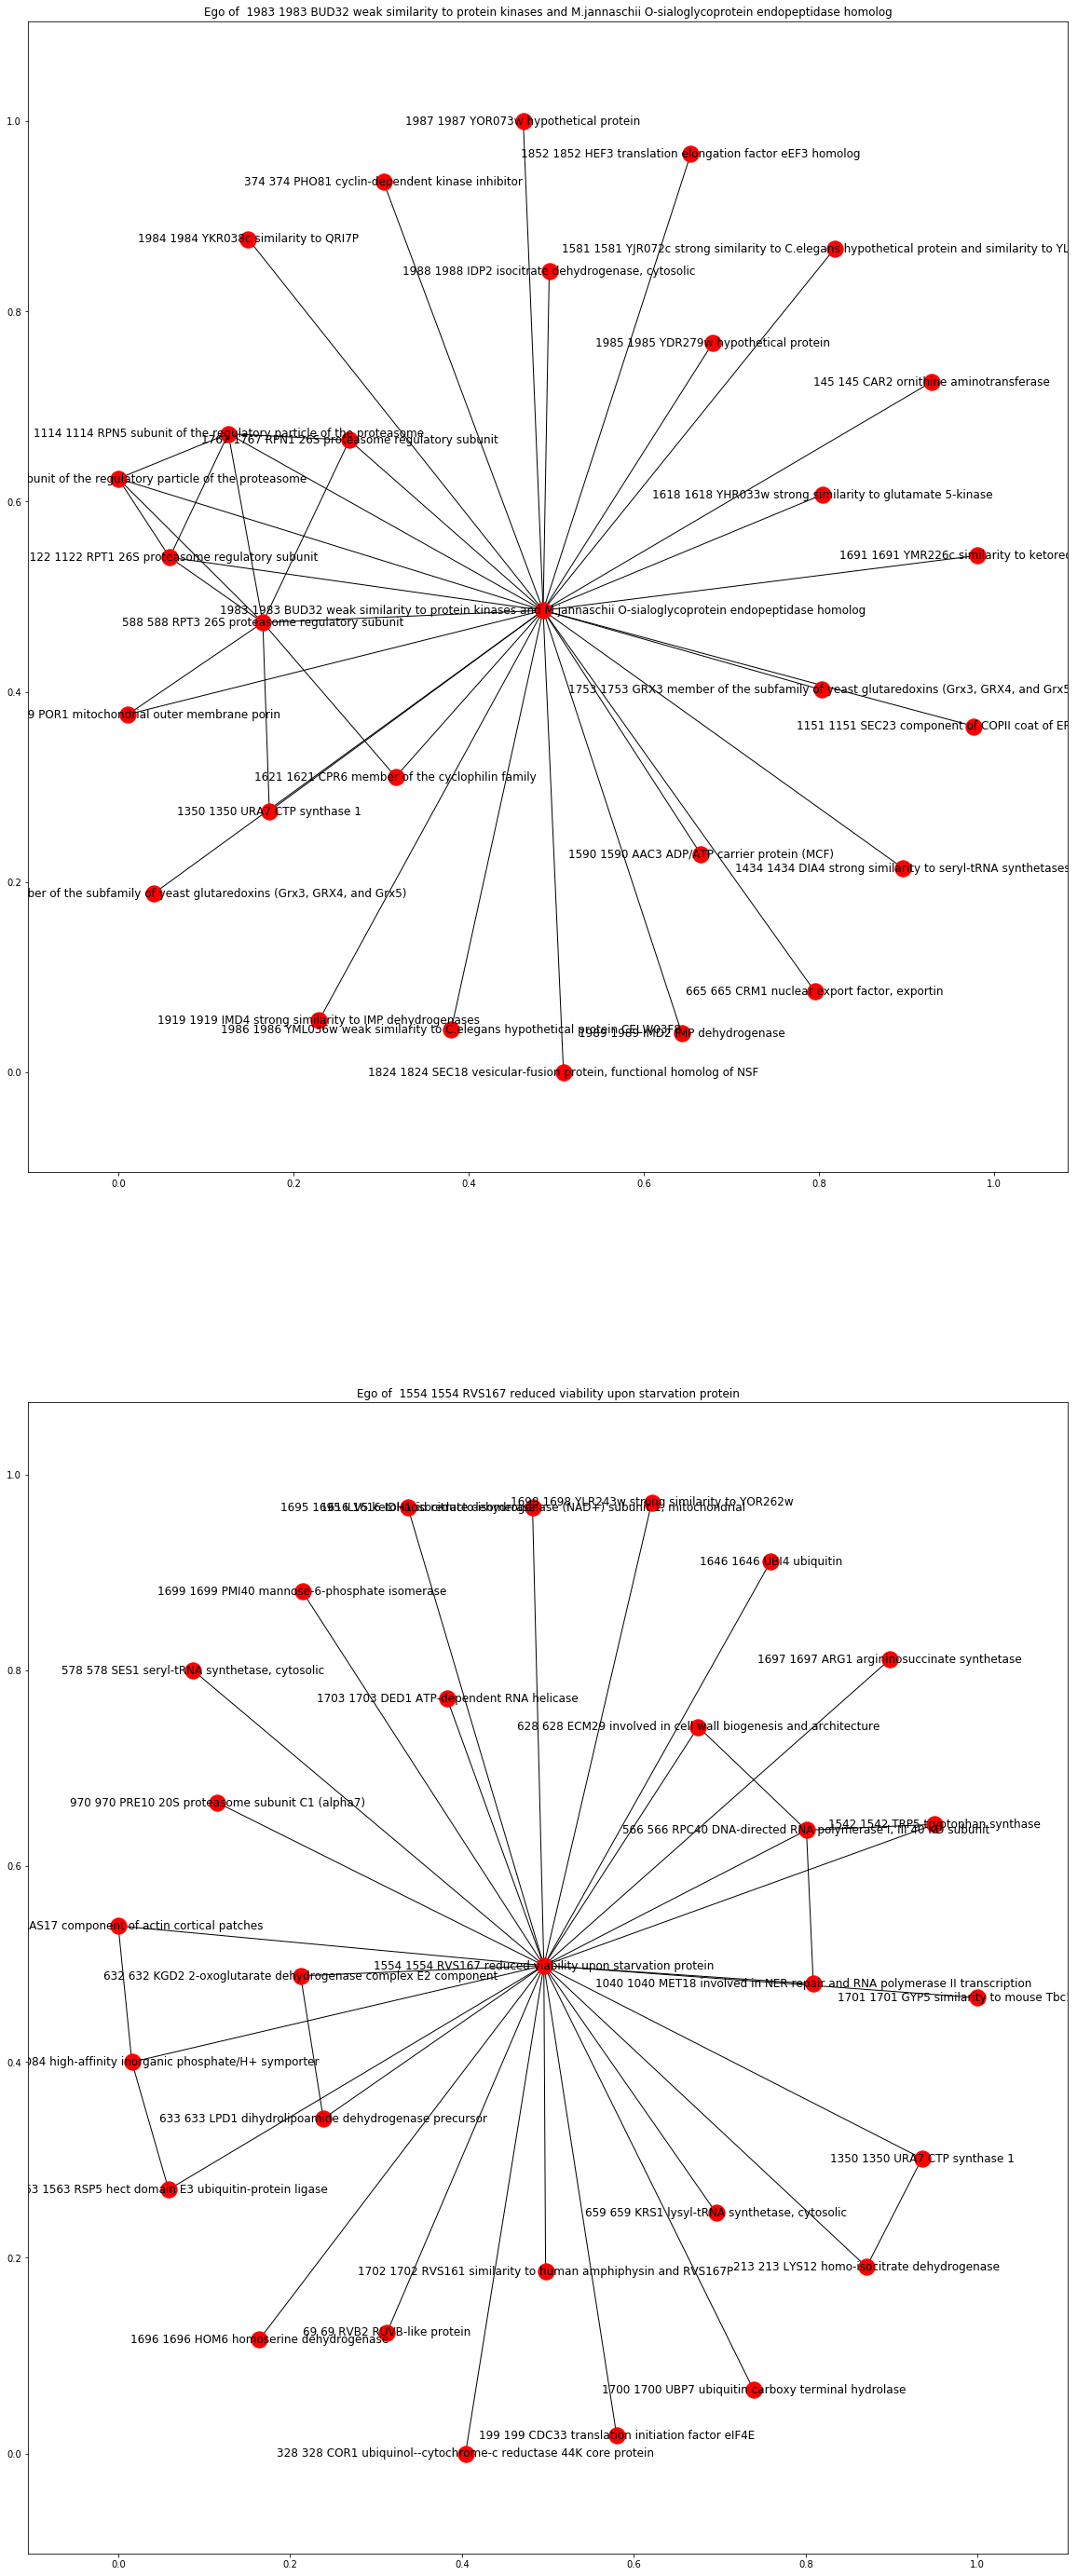

In [111]:
figure(figsize=[20,50])
f1=subplot(2,1,1)
f1.set_title('Ego of  '+n1)
networkx.draw_networkx(Sub_n1)
f2=subplot(2,1,2)
f2.set_title('Ego of  '+n2)
networkx.draw_networkx(Sub_n2)